<a href="https://colab.research.google.com/github/talhanawazish/Project6220Submission/blob/main/Talha6220project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.models
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

from scipy.stats import zscore
#data loading and sorting
df=pd.read_csv("/content/Medicaldataset.csv")
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [ ]:
df.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

In [ ]:
result_dict = {'positive': 1,
               'negative': 0
              }

df['Result'] = df['Result'].map(result_dict)

In [ ]:
df = df.rename(columns={"Systolic blood pressure":"ap_hi", "Diastolic blood pressure":"ap_lo"})

<Axes: >

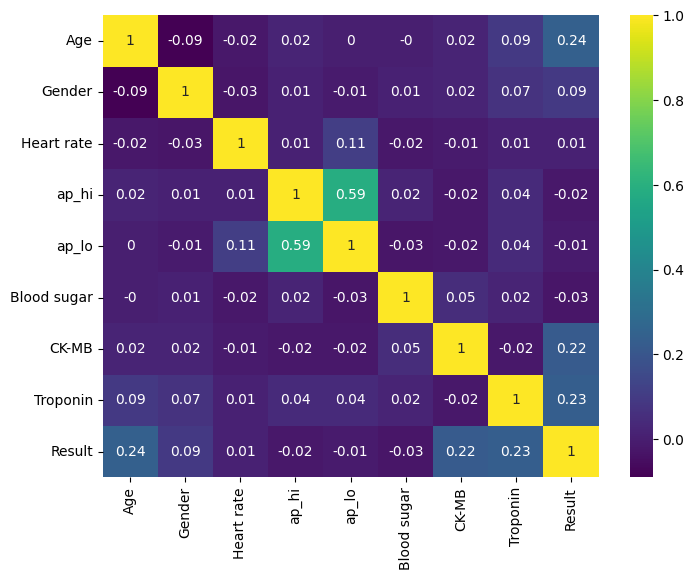

In [ ]:
plt.figure(figsize=(8, 6))
heatmap_data = df.corr().round(2)
sns.heatmap(heatmap_data, annot=True,cmap='viridis')

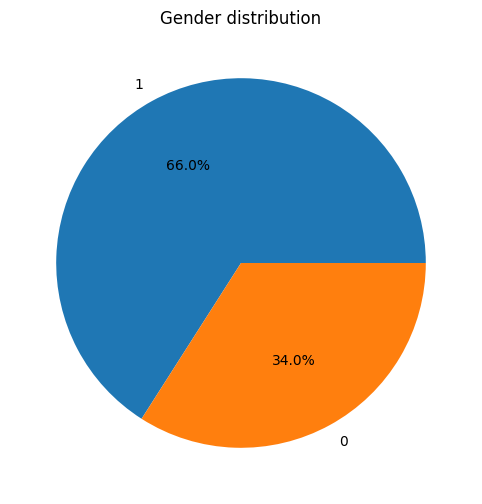

In [ ]:
# check for gender distribution
plt.figure(figsize=(8, 6))
sizes = df["Gender"].value_counts()
plt.pie(sizes, labels=sizes.index, autopct="%1.1f%%")
plt.title("Gender distribution")
plt.show()
# 1 - Male
# 0 - Female

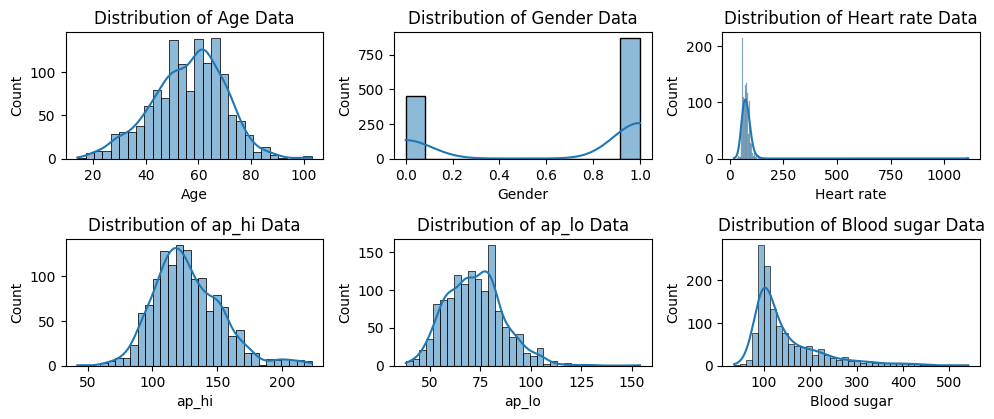

In [ ]:
columns = ["Age", "Gender", "Heart rate", "ap_hi", "ap_lo", "Blood sugar"]
plt.figure(figsize=(10, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.plot()

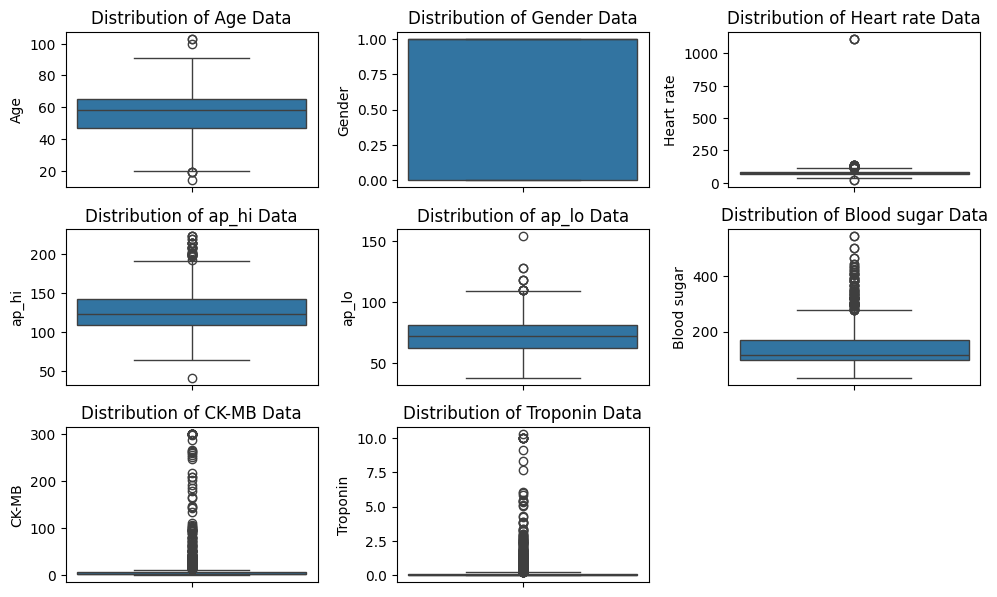

In [ ]:
plt.figure(figsize=(10,8))
for i,col in enumerate(df.columns[:-1],1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.plot()

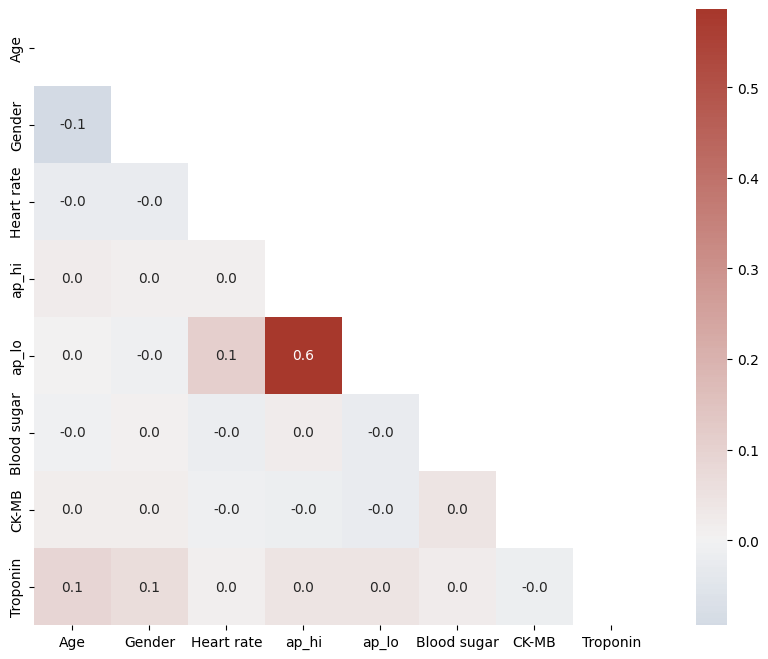

In [ ]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, center=0, annot=True,
             fmt=".1f", square=True, cmap=cmap)
plt.show()

In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

X = df.drop('Result', axis=1)
y = df['Result']
y_encoded = label_encoder.fit_transform(df['Result'])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
model=RandomForestClassifier()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [ ]:
accuracy

0.9810606060606061

In [ ]:
recall


0.9847094801223242

In [ ]:
precision

0.9817073170731707

In [ ]:
f1

0.9847094801223242

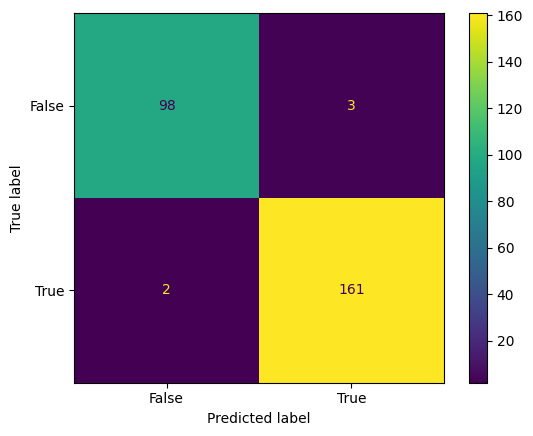

In [ ]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


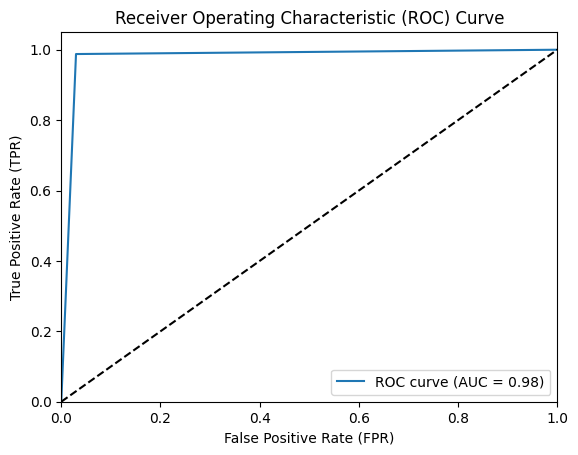

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()